In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TASK 1. Data Cleaning and Preliminary Analysis:

In [ ]:
#Loading the dataset into a pandas DataFrame

import pandas as pd
import numpy as np
a = pd.read_csv('/content/drive/My Drive/train.csv')
b = pd.read_csv('/content/drive/My Drive/test.csv')
file = pd.concat([a, b], ignore_index=True, sort  = False)
# Display the first 4 rows
file.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
#handling missing values

print(file.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [ ]:
df = file.copy()
df = file.dropna(subset=['Cabin'])

In [ ]:
df['Age'].fillna(df['Age'].mean())

1       38.0
3       35.0
6       54.0
10       4.0
11      58.0
        ... 
1295    43.0
1296    20.0
1298    50.0
1302    37.0
1305    39.0
Name: Age, Length: 295, dtype: float64

In [ ]:
df['Survived'].fillna(df['Survived'].mean())

1       1.000000
3       1.000000
6       0.000000
10      1.000000
11      1.000000
          ...   
1295    0.666667
1296    0.666667
1298    0.666667
1302    0.666667
1305    0.666667
Name: Survived, Length: 295, dtype: float64

In [ ]:
#brief description of each column using describe()
#it makes us aware of the measures of central tendency and the Interquartile Ranges(IQR)

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,295.000000,204.000000,295.000000,272.000000,295.000000,295.000000,295.000000
mean,654.854237,0.666667,1.186441,36.922500,0.481356,0.444068,81.928998
std,371.450030,0.472564,0.510921,15.587467,0.632583,0.766712,79.018925
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,331.000000,0.000000,1.000000,25.000000,0.000000,0.000000,29.700000
50%,660.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,963.000000,1.000000,1.000000,48.000000,1.000000,1.000000,92.289600
max,1306.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [ ]:
cat = df.select_dtypes(include=['object']).columns
num = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", cat)
print("Numerical Columns:", num)

Categorical Columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
Numerical Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
#nunique() has been used to display the number of unique values in each feature
for col in df.columns:
    uv = df[col].nunique()
    dt = df[col].dtype
    print(f" {col}: {dt}, {uv} Unique Values")

 PassengerId: int64, 295 Unique Values
 Survived: float64, 2 Unique Values
 Pclass: int64, 3 Unique Values
 Name: object, 295 Unique Values
 Sex: object, 2 Unique Values
 Age: float64, 71 Unique Values
 SibSp: int64, 4 Unique Values
 Parch: int64, 5 Unique Values
 Ticket: object, 174 Unique Values
 Fare: float64, 112 Unique Values
 Cabin: object, 186 Unique Values
 Embarked: object, 3 Unique Values


TASK 2. NumPy Tasks:Change columns into numpy arrays

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
df['Age'].head()

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
Name: Age, dtype: float64

In [ ]:
c=['Fare', "Pclass" ]

In [ ]:
#Converting relevant columns into NumPy arrays & computing mean, median, and standard deviaton

for col in c:
    values = df[col].values
    mean = np.mean(values)    #values is used to change to numpy array
    med = np.median(values)
    sd = np.std(values)
    print(f"Column: {col}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {med:.2f}")
    print(f"Standard Deviation: {sd:.2f}")
    print(end="\n")

Column: Fare
Mean: 81.93
Median: 57.00
Standard Deviation: 78.88

Column: Pclass
Mean: 1.19
Median: 1.00
Standard Deviation: 0.51



Pclass has similar modes of tendency.In the case of Fare, median is quite low as compared to mean and std deviation. This implies that some values in dataset are quite high due to whih the mean is higher.

 Also, the data is spread to a greater extent around the mean so the std deviation is also higher in this case.

In [ ]:
#correlaton coefficient between two numerical columns using NumPy

pc=df['Pclass'].values
a=df['Age'].values

In [ ]:
correlation_matrix = np.corrcoef(pc,a)
coeff = correlation_matrix[0, 1]
coeff

-0.31133090070425495

Hence, passenger class and the age of passengers are negatively correlated so an increase in the values of first feature will not impact the 2nd one.

TASK 3. Univariate Analysis

In [ ]:
#Using Seaborn to plot the distribution of three numerical columns

c=['Fare', "Pclass", 'Age' ]

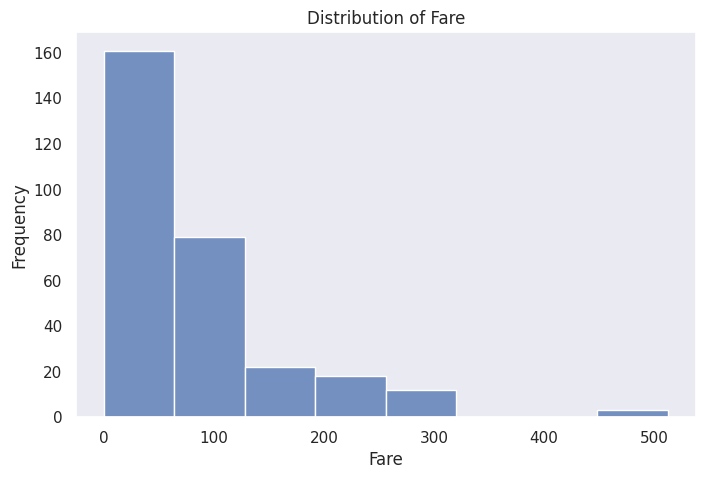

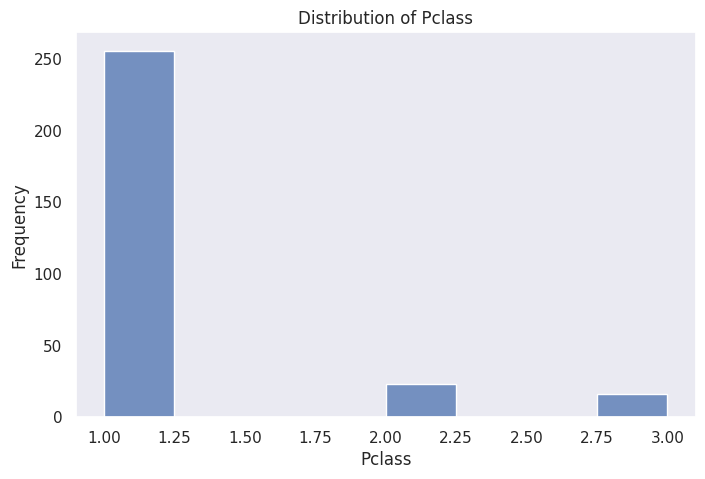

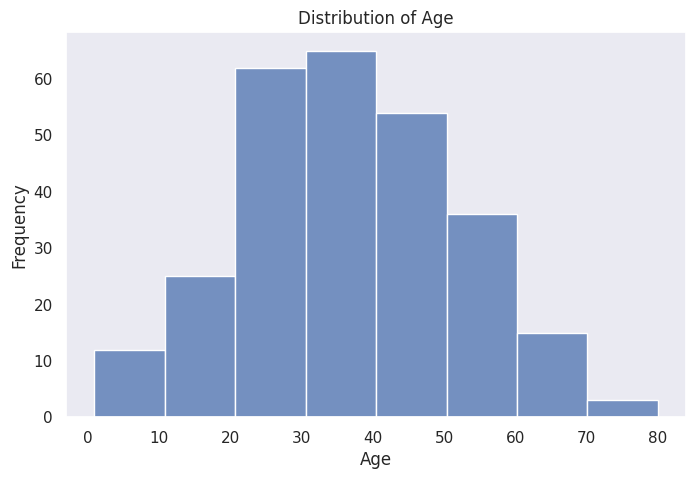

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='dark')
for column in c:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, bins=8, kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The histograms show distribution of features like 'Fare', "Pclass", 'Age'. A minimal number of people have spent between 400 to 500 as the fare price while on the contrary, many have spent a small amount on the ticket.

Mostly, passengers traveled by first class. Wrt Age, large number of middle aged passengers were present. Elder people were comparatively less.

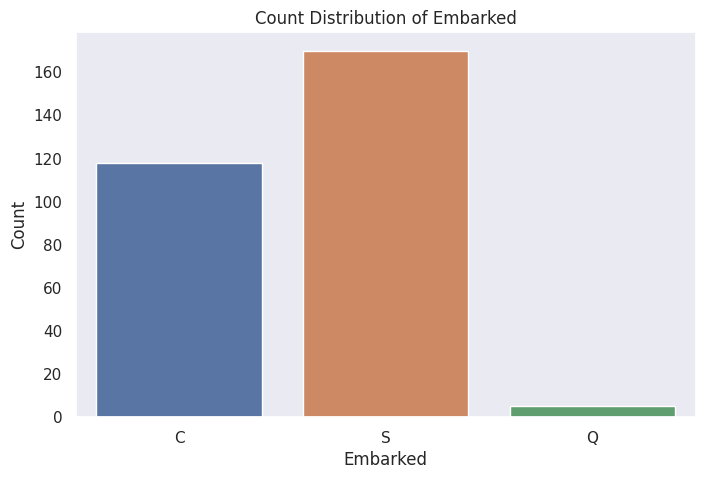

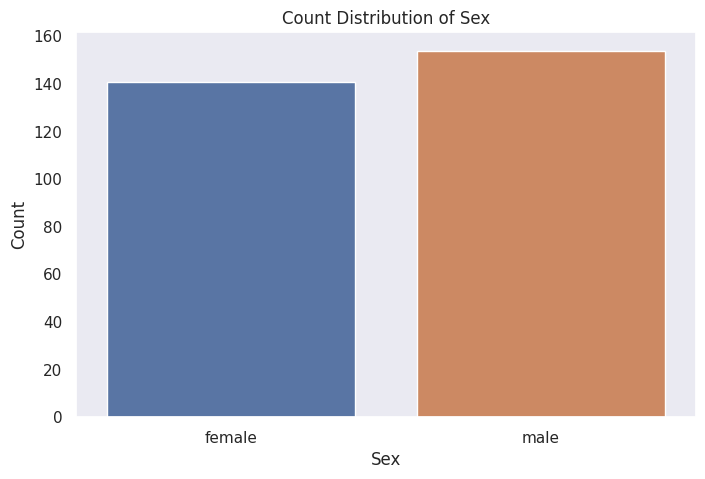

In [ ]:
# Plotting the count distribuion of two categorical columns

d=['Embarked', "Sex" ]
for column in d:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='deep')
    plt.title(f'Count Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

The Sex feature shows an almost equal distribution between male and female passengers. With respect to Embarked, a large number of passengers boarded the ship from Southampton followed by Cherbourg. We have the least boardings from Queenstown

TASK 4. Bivariate Analysis

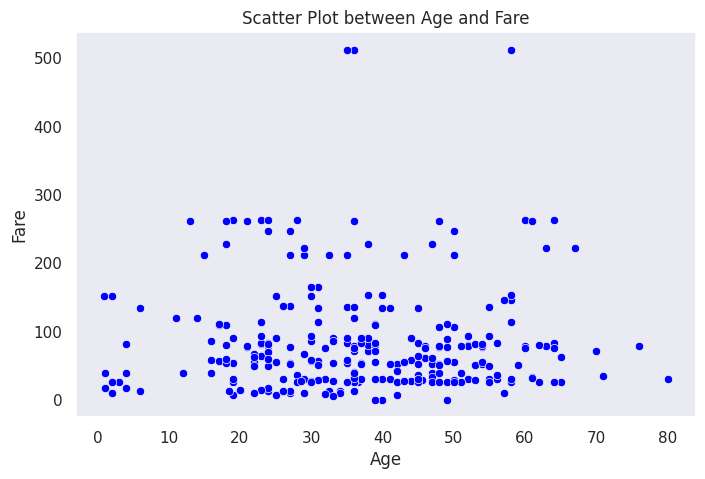

In [ ]:
#scatter plot between two numerical columns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Fare', color='blue')
plt.title('Scatter Plot between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The scatter plot further sheds some light on the data of Fare vs Age. There is no increasing or decreasing line which means that the 2 variables aren't correlated. We can also spot a few outliers.

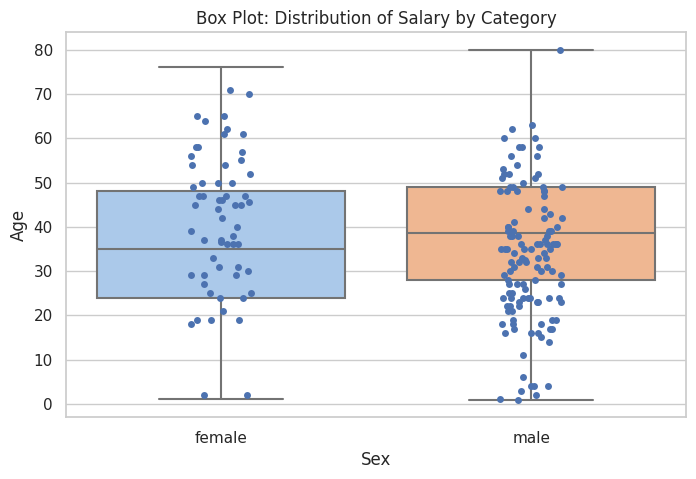

In [ ]:
# boxplot showcasing the distribution of a numerical column against a categorical column

plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.boxplot(data=df, x='Sex', y='Age', palette='pastel')
ax = sns.stripplot(x="Survived", y="Age",data=df)
plt.title('Box Plot: Distribution of Salary by Category')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

Clearly a few outliers are present in the case of 'male' and 'female. I have used stripplot too to indicate the distribution of data. It seems to be equally distributed in the case of 'male' passengers and centered around the median. There are more females in the age group of 20 to 70 as compared to children as female passengers but children who are males are present too.

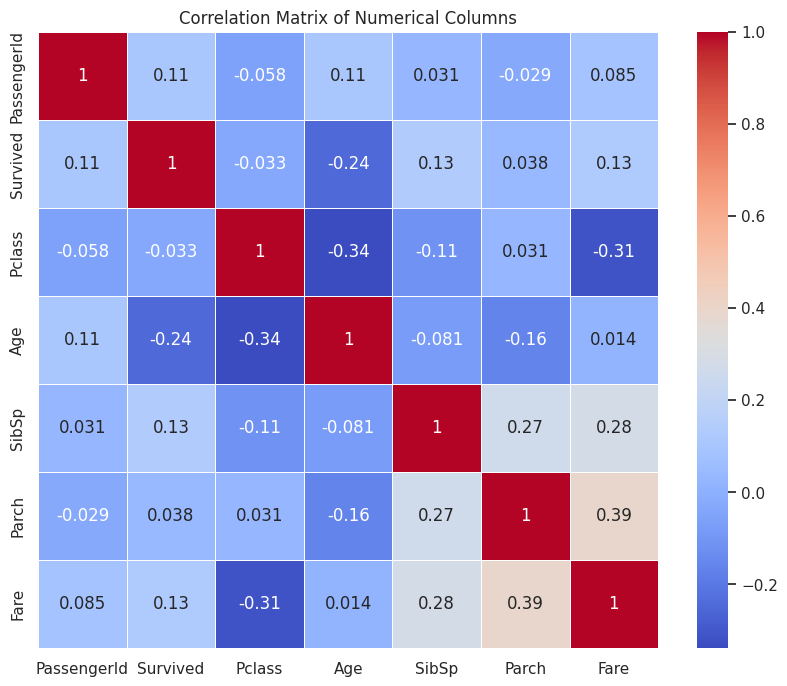

In [ ]:
#Computing and visualizing the correlation matrix of the numerical columns.

e = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[e].corr()
# heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=.5) #adds the correlation coefficients to the cells
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Correkation closed to 1 are in darker colours like red here while the variables that are not closely related have lighter hues of blue. Majorly these variables have a lighter shade and negatively correlated or correlation is close to 0. It means that mostly variables aren't dependent on each other.

TASK 5. Advanced Questions

In [ ]:
#fitting a linear regression model on a numerical column
import numpy as np
from sklearn.linear_model import LinearRegression

<ipython-input-207-aec3fc590fa4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(mean_X, inplace=True)


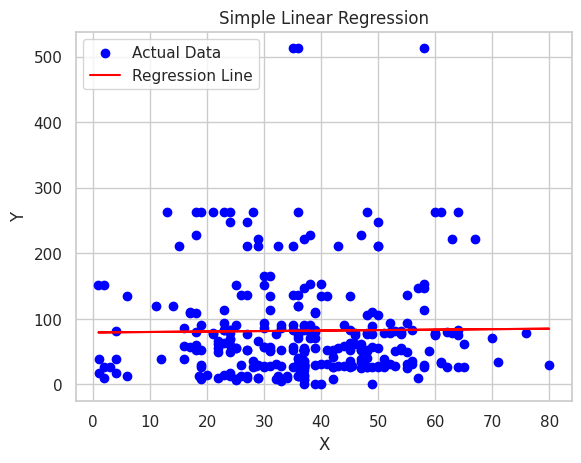

Slope (Coefficient): 0.07
Intercept: 79.29


In [ ]:
from sklearn.linear_model import LinearRegression

mean_X = df['Age'].mean()
df['Age'].fillna(mean_X, inplace=True)

X = df[['Age']]
Y = df['Fare']

model = LinearRegression()
model.fit(X, Y)

# Predict 'Y' values based on 'X' values
Y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.scatter(X, Y, label='Actual Data', color='blue')
plt.plot(X, Y_pred, label='Regression Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Get the coefficients (slope and intercept) of the linear regression model
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope (Coefficient): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')

NaN values are altered with mean Age using fillna() method.
Correlation is close to 0 implies that Age and Fare are not highly correlated but slightly correlated. It implies that with increase in Age, the passengers are paying slightly more. This increase is by a value of 0.07.


In other words, as age increases by 1 year, the fare increases by 0.07.


Intercept here means when Age =0 , what value of Y will be obtained. However, it is of no practical use.

The slope is almost horizontal which implies that the increase is extremely minimal.

In [ ]:
#Grouping data by a categorical column and obtain the mean and standard deviation

z=[ 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for col in z:
  grouped_ans = df.groupby('Sex').agg({col: ['mean', 'std']})
  print(grouped_ans)

        Survived          
            mean       std
Sex                       
female  0.938144  0.242145
male    0.420561  0.495972
          Pclass          
            mean       std
Sex                       
female  1.191489  0.505892
male    1.181818  0.517088
              Age           
             mean        std
Sex                         
female  35.290479  14.947581
male    38.416753  14.873103
           SibSp          
            mean       std
Sex                       
female  0.588652  0.687344
male    0.383117  0.562418
           Parch          
            mean       std
Sex                       
female  0.553191  0.814384
male    0.344156  0.708306
             Fare          
             mean       std
Sex                        
female  95.183335  78.22329
male    69.793534  78.03299


For smaller mean and standard deviation , the points revolve around a small cluster only as is the case with Survived, Pclass, SibSp, Parch features. The others have a comparatively higher mean and deviation which means that they are centered around a large cluster of values.

Males are slightly older than females as is visible from the mean. Besides this,a few female passengers are paying more amount than the males. It may be because some people opted for first class tickets and majorly they would be females.

TASK 6. Bonus:


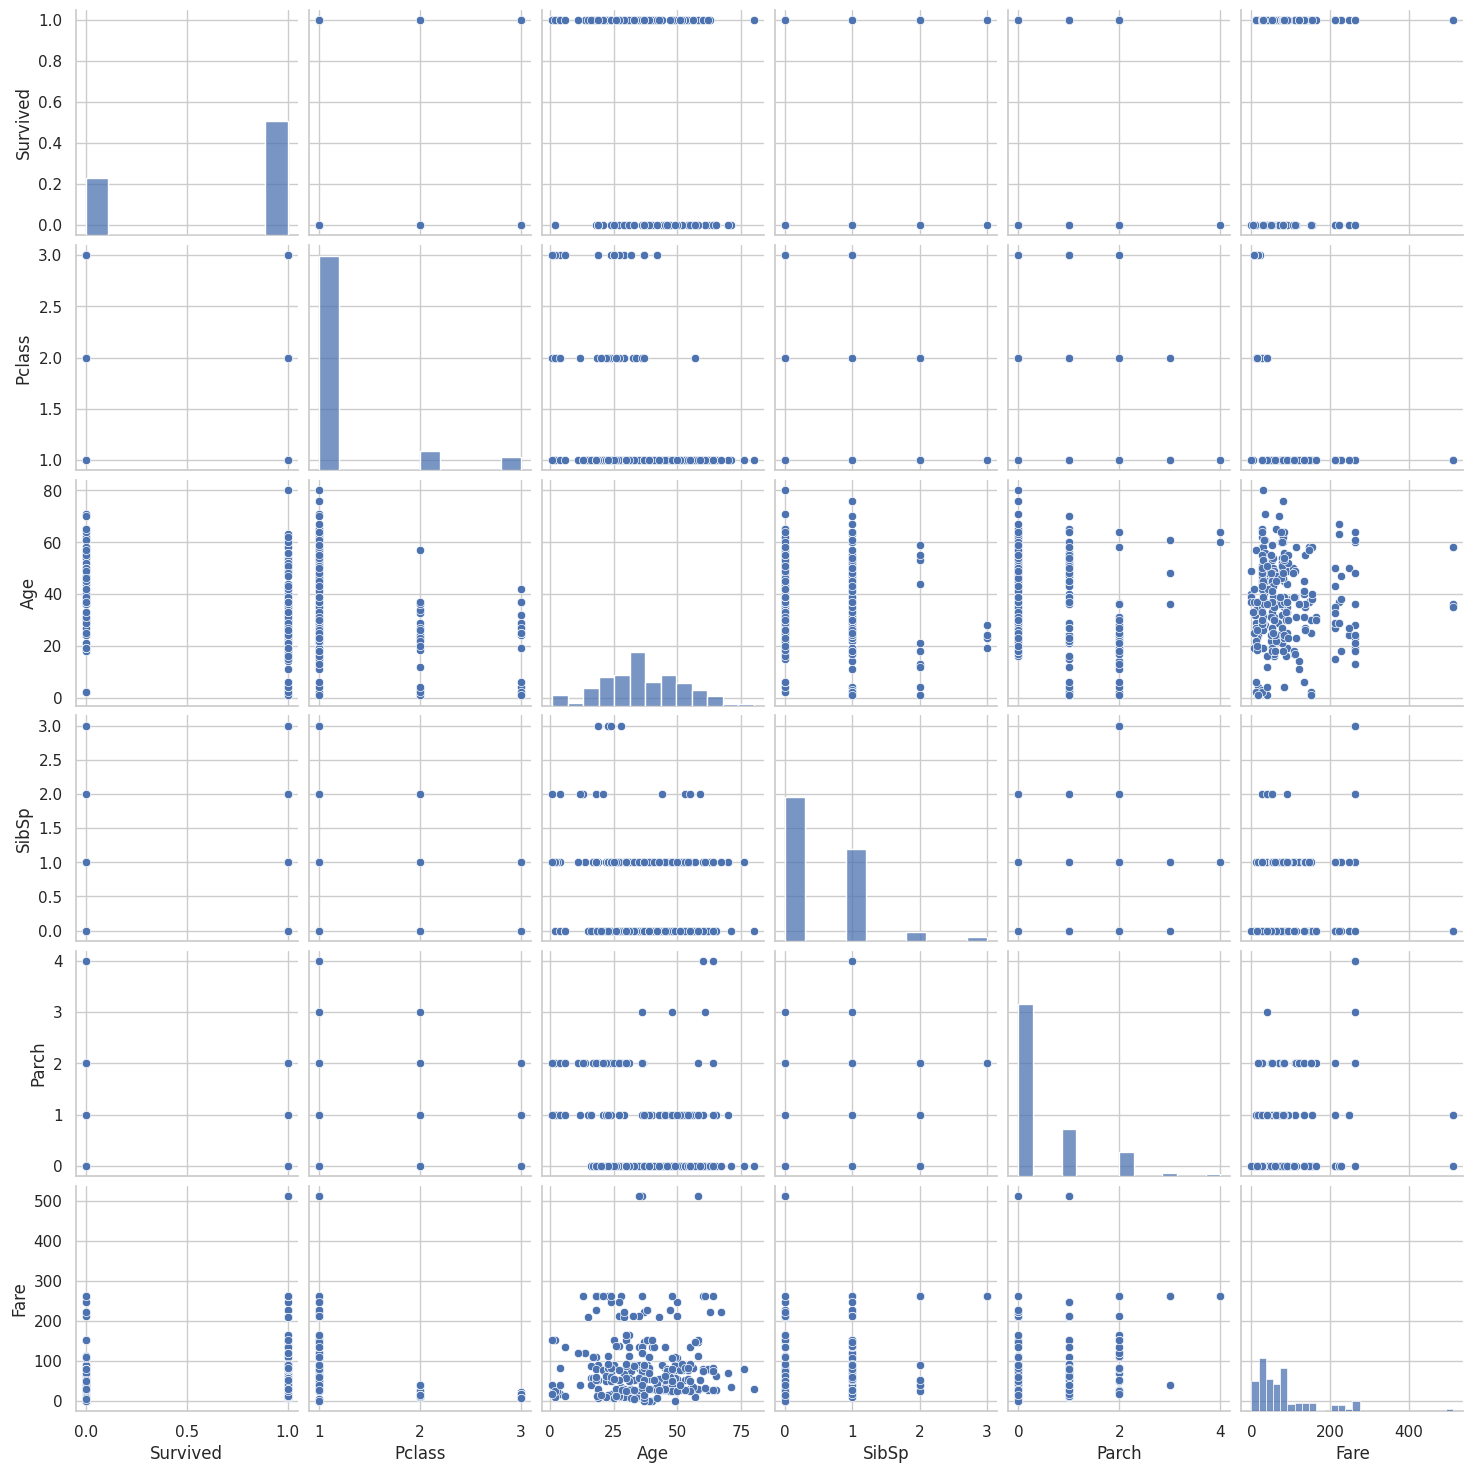

In [ ]:
#pair plot of the dataset (using Seaborn) to showcase relationships between all numerical columns.
sns.pairplot(df[z] )
plt.show()

This pair plot has been created with the help of seaborn to visualize relation between numerical variables.Scatter plots are created along with histograms on the diagonal.

The histograms on the diagonal specify the distribution of these numerical variables in the dataset.They discuss how the data is distributed for that particular variable.The scatter plots are those which are not present on the diagonal.

Outliers can be detected in some plots like Fare vs Parch, Fare vs Age, etc.

The correlation is weak wherever we see horizontal lines like Parch vs Age, Survived vs Fare and so on.

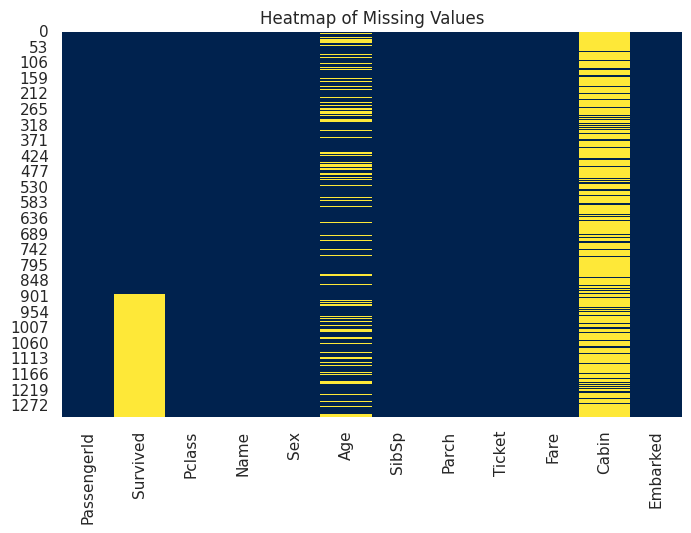

In [ ]:
#heat map of missing values

plt.figure(figsize=(8, 5))
sns.heatmap(file.isnull(), cmap='cividis', cbar=False)  #colorbar shows color mapping of the values.
plt.title('Heatmap of Missing Values')
plt.show()

The original dataset 'file' has been used to check the missing values in the original dataset. The yellow markings represent Nan values i.e. missing values in the dataset.

'cividis' palette has been utilized.It is evident that Cabin field has the highest number of missing values.

Age column has few missing values spread all over the dataset. Due to this, Cabin column was dropped and Null values of Age were replaced with the mean. The same was done with Survived as in this column the bottommost entries usually have missing values.

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/pythonassignment.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/pythonassignment.ipynb to html
[NbConvertApp] Writing 1265323 bytes to /content/drive/MyDrive/pythonassignment.html


In [ ]:

m=3
n=3
matrix=[[1,1,1],[1,0,1],[1,1,1]]
arr=[]
for i in range(m):
  for j in range(n):
    if matrix[i][j]==0:
      arr.append([i,j])
print(arr)
for k,l in arr:
  for row in range(n):
    print(matrix[k][row])
    matrix[k][row]=0

  for col in range(m):
    matrix[col][l]=0


[[1, 1]]
1
0
1
